<div style="background-color:maroon; padding:10px;">
</div>

# AM 205 - Advanced Scientific Computing: Numerical Methods
<div style="background-color:maroon; padding:10px;">
</div>

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructor**: Prof. Nick Trefethen<br/>
**Author**: Elaine Swanson

### 1. **p2_howfast** how fast can we solve Ax=b in Python?
#### This code measures and analyzes the computational performance of solving the linear system $Ax=b$ for different matrix sizes. 
- first solves the system for small matrices to verify the solution 
- then proceeds to larger matrices, measuring the time required to solve each system
- plots the time taken to solve matrices of increasing dimensions and compares it to the theoretical time complexity of $N^3$, which is typical for solving dense linear systems using Gaussian elimination. 
    - this helps visualize the performance of the solver as the matrix size increases.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
import time

The `solve()` function from `scipy.linalg` typically uses LU decomposition to solve a system of linear equations $Ax = b$, where $A$ is a square matrix. Specifically, it factorizes the matrix $A$ into 3 matrices:

$
A = PLU
$

Where:
- $P$: A permutation matrix.
- $L$: A lower triangular matrix.
- $U$: An upper triangular matrix.

Once $A$ is decomposed, the system is solved by forward and backward substitution. This approach is efficient for dense linear systems and is the default algorithm for `scipy.linalg.solve()`.

### Additional Details:
- **LU decomposition** is typically used for general square matrices.
- If the matrix is symmetric and positive definite, **Cholesky decomposition** may be used instead (especially if you use `scipy.linalg.cho_solve()`).
- For systems involving over- or under-determined matrices, other functions like `scipy.linalg.lstsq()` (for least squares) or `scipy.linalg.pinv()` (for pseudoinverse) are more appropriate.
- In general, `scipy.linalg.solve()` automatically chooses an efficient algorithm for dense matrices based on the input properties, but LU decomposition is the most common.

In [28]:
## solving Ax = b for a small matrix
A = np.random.rand(5, 5) 
b = np.ones(5)  
x = solve(A, b)  
## print A * x as a vertical vector with more decimal places
print("A * x =")
for element in Ax:
    print(f"{element:.20f}")

## print A * x - b as a vertical vector
Ax_b = Ax - b
print("A * x - b =\n", Ax_b.reshape(-1, 1))

A * x =
0.99999999999999988898
1.00000000000000000000
1.00000000000000022204
1.00000000000000022204
1.00000000000000000000
A * x - b =
 [[-1.11022302e-16]
 [ 0.00000000e+00]
 [ 2.22044605e-16]
 [ 2.22044605e-16]
 [ 0.00000000e+00]]


In [29]:
## solving Ax = b for a larger matrix
A = np.random.randn(500, 500)  
b = np.ones(500)  
x = solve(A, b)    
print("Last element of residual:", (np.dot(A, x) - b)[-1])  

## timing the solution for increasing matrix sizes
for N in [1000, 2000, 4000, 8000, 16000]:
    A = np.random.randn(N, N)
    b = np.ones(N)
    start_time = time.time()
    solve(A, b)  # Solve the system
    elapsed_time = time.time() - start_time
    print(f"Time for N = {N}: {elapsed_time:.4f} seconds")

Last element of residual: -8.881784197001252e-14
Time for N = 1000: 0.2224 seconds
Time for N = 2000: 1.1315 seconds
Time for N = 4000: 2.4019 seconds
Time for N = 8000: 7.1727 seconds
Time for N = 16000: 85.6710 seconds


In [30]:
## create large matricies and time solving the linear system
NN = []
tt = []

for i in range(1, 14):
    N = 2**i
    A = np.random.randn(N, N)
    b = np.ones(N)
    
    start_time = time.time()
    solve(A, b)
    elapsed_time = time.time() - start_time
    
    NN.append(N)
    tt.append(elapsed_time)

A **log-log plot** is used to display data that follows a power-law relationship or spans several orders of magnitude, making it easier to visualize trends and patterns that are otherwise difficult to observe in a linear scale. 

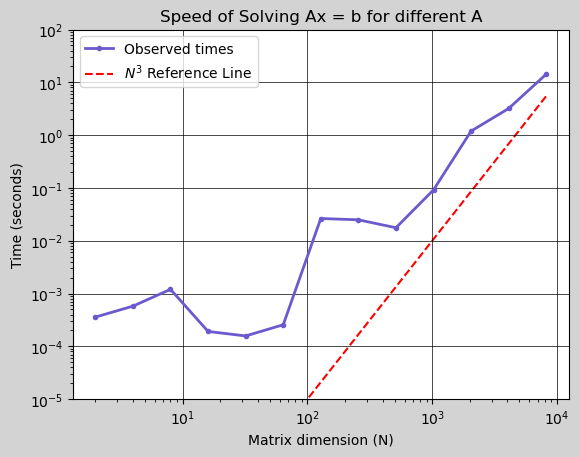

In [31]:
plt.figure(facecolor='lightgray')

## log-log plot for the observed times
plt.loglog(NN, tt, '.-', linewidth=2, color='#6A5ACD', label="Observed times")

plt.grid(True, color='black', linestyle='-', linewidth=0.5, zorder=0)
plt.xlabel("Matrix dimension (N)")
plt.ylabel("Time (seconds)")
plt.title("Speed of Solving Ax = b for different A")

## N^3 reference line
plt.loglog(NN, 1e-11 * np.array(NN)**3, '--r', label=r"$N^3$ Reference Line", zorder=1)
plt.ylim([1e-5, 1e2])
plt.legend()
plt.show()